In [1]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

dx = 1e-6

In [3]:
def phi(alpha):
    return (alpha ** 3) + 3 * (alpha ** 2) - 1

x = np.linspace(-1, 1, 1000)
y = phi(x)

# Bisection method

In [4]:
def bissection(phi, a, b, tol):
    while abs(b - a) > tol:
        c = (a + b) / 2
        if derivative(phi, c, dx=dx) * derivative(phi, b, dx=dx) <= 0:
            if derivative(phi, c, dx=dx) == 0 and derivative(phi, c, dx=dx, n=2) > 0:
                return c
            a = c
        else:
            b = c
    return c

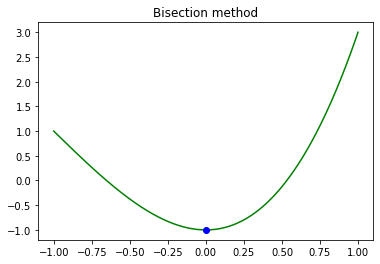

In [5]:
plt.title('Bisection method')
x_sol = bissection(phi, -1, 1, 0.0001)
y_sol = phi(x_sol)
plt.plot(x, y, 'g')
plt.plot(x_sol, y_sol, 'bo')
plt.show()

# Newton raphson method

In [6]:
def newton_raphson(phi, x0, tol):
    x = x0
    while abs(derivative(phi, x, dx=dx)) > tol:
        d = -derivative(phi, x, dx=dx) / derivative(phi, x, dx=dx, n=2)
        x_prev = x
        x = x_prev + d
    return x

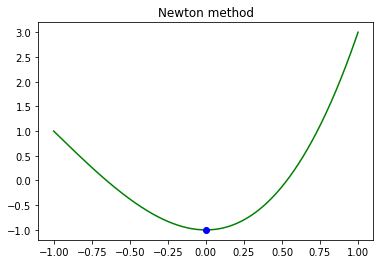

In [7]:
plt.title('Newton method')
x_sol = newton_raphson(phi, -0.5, 0.0001)
y_sol = phi(x_sol)
plt.plot(x, y, 'g')
plt.plot(x_sol, y_sol, 'bo')
plt.show()

# False position method

In [8]:
def false_position(phi, x0, x1, tol):
    x = x1
    x_prev = x0
    while abs(x - x_prev) > tol or abs(derivative(phi, x, dx=dx)) > tol:
        d = -derivative(phi, x, dx=dx) * (x - x_prev) / (derivative(phi, x, dx=dx) - derivative(phi, x_prev, dx=dx))
        x_prev = x
        x = x_prev + d
    return x

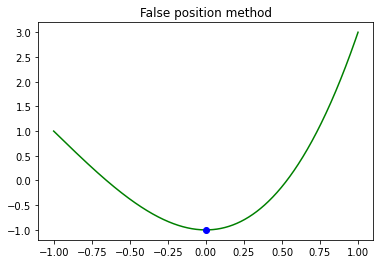

In [9]:
plt.title('False position method')
x_sol = false_position(phi, -1, 1, 0.0001)
y_sol = phi(x_sol)
plt.plot(x, y, 'g')
plt.plot(x_sol, y_sol, 'bo')
plt.show()